In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [4]:
data =pd.read_csv('IBM.csv')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
clean_data = data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
clean_data.shape

(1470, 31)

In [6]:
gender = pd.get_dummies(clean_data['Gender'], drop_first = True,prefix="gender")
attrition = pd.get_dummies(clean_data['Attrition'], drop_first = True,prefix="attrition")


In [7]:
clean_data = data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
clean_data.shape

(1470, 31)

In [8]:
n = LabelEncoder()
clean_data["BusinessTravel"]= n.fit_transform(clean_data["BusinessTravel"].astype('str'))
clean_data["Department"]= n.fit_transform(clean_data["Department"].astype('str'))
clean_data["OverTime"]= n.fit_transform(clean_data["OverTime"].astype('str'))
clean_data["EducationField"]= n.fit_transform(clean_data["EducationField"].astype('str'))
clean_data["JobRole"]= n.fit_transform(clean_data["JobRole"].astype('str'))
clean_data["MaritalStatus"]= n.fit_transform(clean_data["MaritalStatus"].astype('str'))
clean_data.head(5)


Age Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41       Yes               2       1102           2                 1   
1   49        No               1        279           1                 8   
2   37       Yes               2       1373           1                 2   
3   33        No               1       1392           1                 3   
4   27        No               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2  Female  ...   
1          1               1                        3    Male  ...   
2          2               4                        4    Male  ...   
3          4               1                        4  Female  ...   
4          1               3                        1    Male  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [9]:
clean_data.drop(['Attrition','Gender'],axis=1,inplace=True)
clean_data= pd.concat([clean_data,gender,attrition],axis =1)
clean_data.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               1                        3          61               2  ...   
2               4                        4          92               2  ...   
3               1                        4          56               3  ...   
4               3                        1          40               3  ...   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  gender_Male  attrition_Yes  
0                        0                     5            0              1  
1                        1                     7            1              0  
2                        0                     0            1              1  
3                        3                     0            0              0  
4                        2                     2            1              0  

[5 rows x 31 columns]

In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   HourlyRate                1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobRole                   1470 non-null   int32
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int32
 14  MonthlyIncome             1470 non-null 

In [9]:
clean_data.columns


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'gender_Male', 'attrition_Yes'],
      dtype='object')

In [10]:
clean_data.nunique()

Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
gender_Male                    2
attrition_

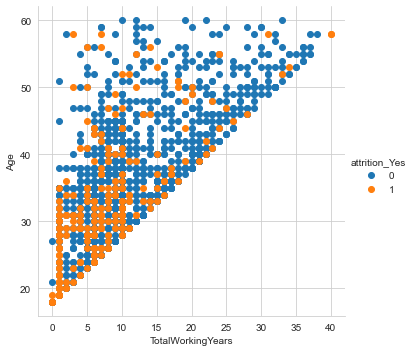

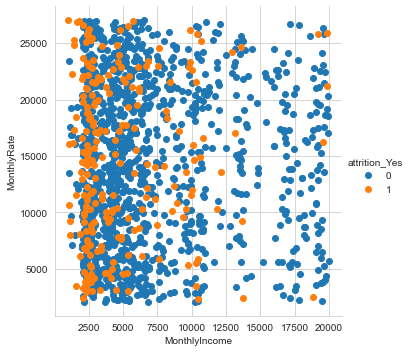

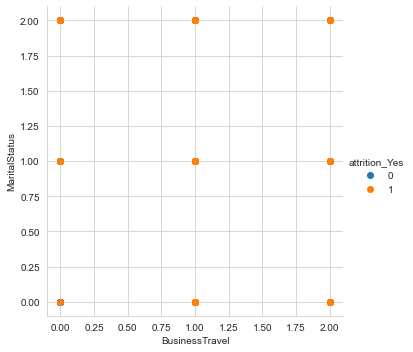

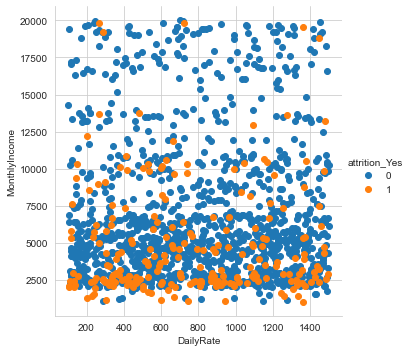

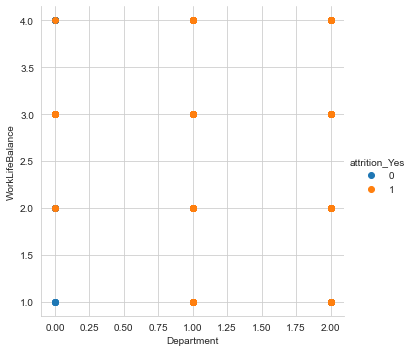

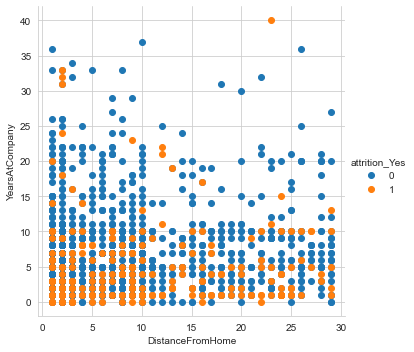

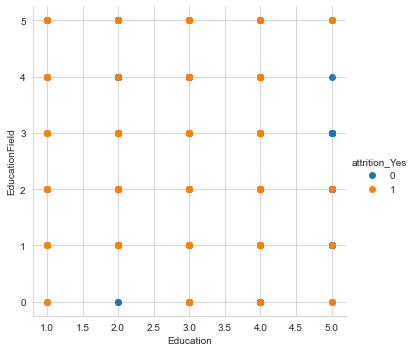

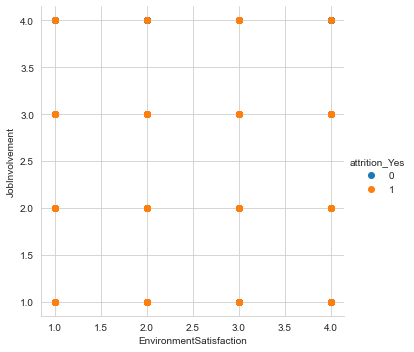

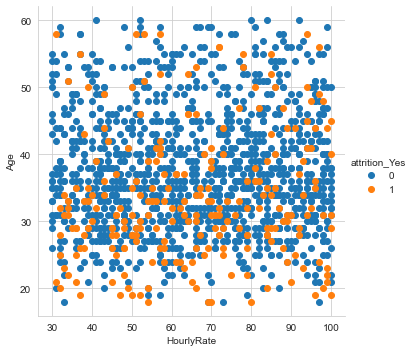

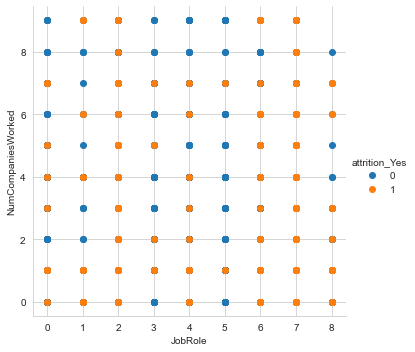

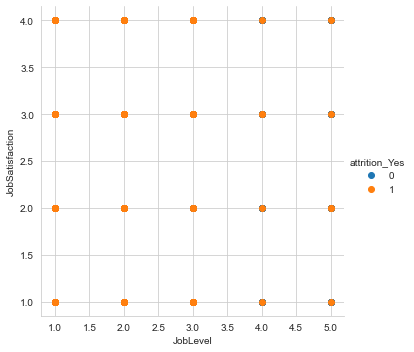

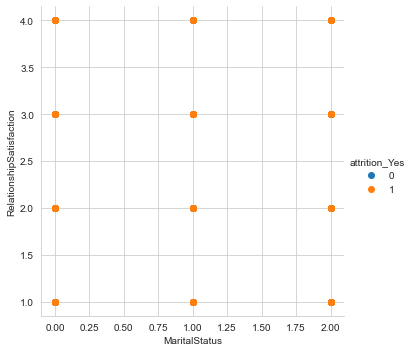

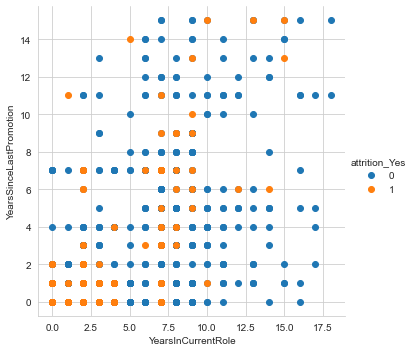

In [84]:
sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'TotalWorkingYears', 'Age')\
   .add_legend();
sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'MonthlyIncome', 'MonthlyRate')\
   .add_legend();
sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'BusinessTravel', 'MaritalStatus')\
   .add_legend();
sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'DailyRate', 'MonthlyIncome')\
   .add_legend();
sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'Department', 'WorkLifeBalance')\
   .add_legend();
sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'DistanceFromHome', 'YearsAtCompany')\
   .add_legend();
sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'Education', 'EducationField')\
   .add_legend();

sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'EnvironmentSatisfaction', 'JobInvolvement')\
   .add_legend();

sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'HourlyRate', 'Age')\
   .add_legend();

sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'JobRole', 'NumCompaniesWorked')\
   .add_legend();

sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'JobLevel', 'JobSatisfaction')\
   .add_legend();

sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'MaritalStatus', 'RelationshipSatisfaction')\
   .add_legend();

sns.set_style('whitegrid');
sns.FacetGrid(clean_data, hue= 'attrition_Yes', height= 5)\
   .map(plt.scatter, 'YearsInCurrentRole', 'YearsSinceLastPromotion')\
   .add_legend();


plt.show()

In [11]:
data1 =clean_data.iloc[:,0:7]
data2 =clean_data.iloc[:,7:15]
data3 =clean_data.iloc[:,15:23]
data4 =clean_data.iloc[:,23:31]
att = clean_data.iloc[:,30:31]


In [12]:
data1= pd.concat([data1,att],axis =1)
data2= pd.concat([data2,att],axis =1)
data3= pd.concat([data3,att],axis =1)


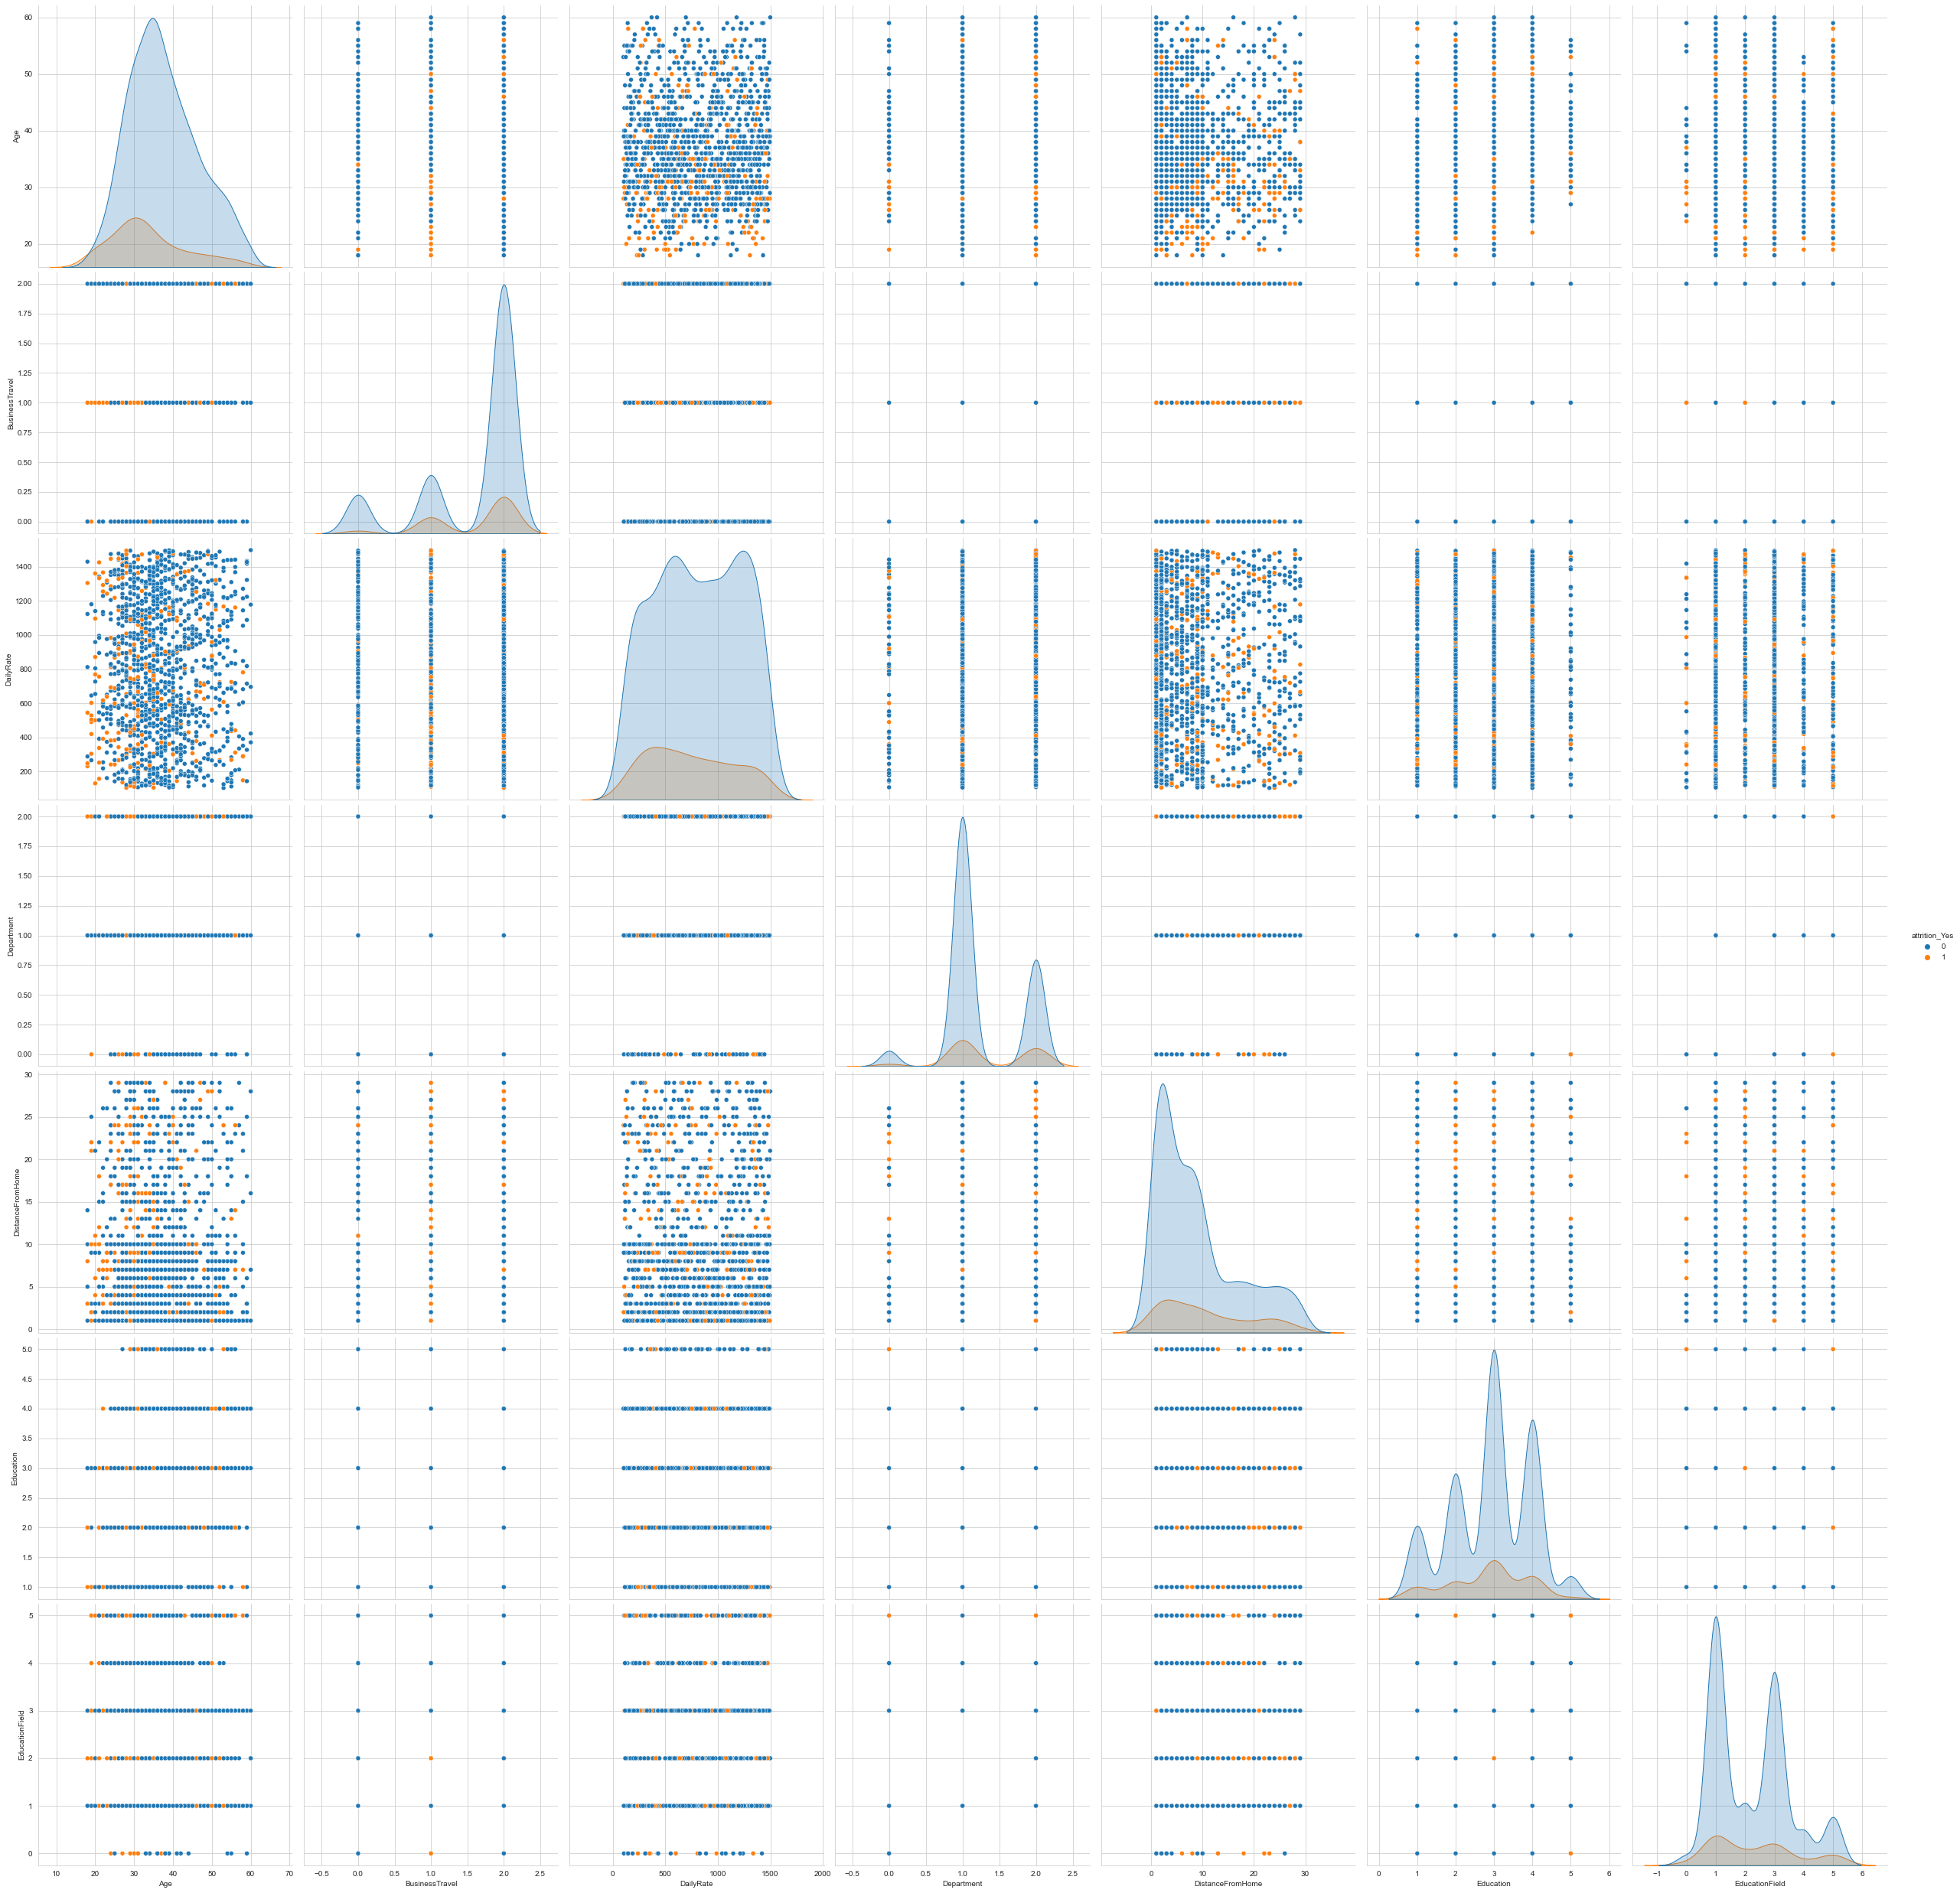

In [87]:
sns.set_style("whitegrid")
sns.pairplot(data1,hue="attrition_Yes",height=5)
plt.show()

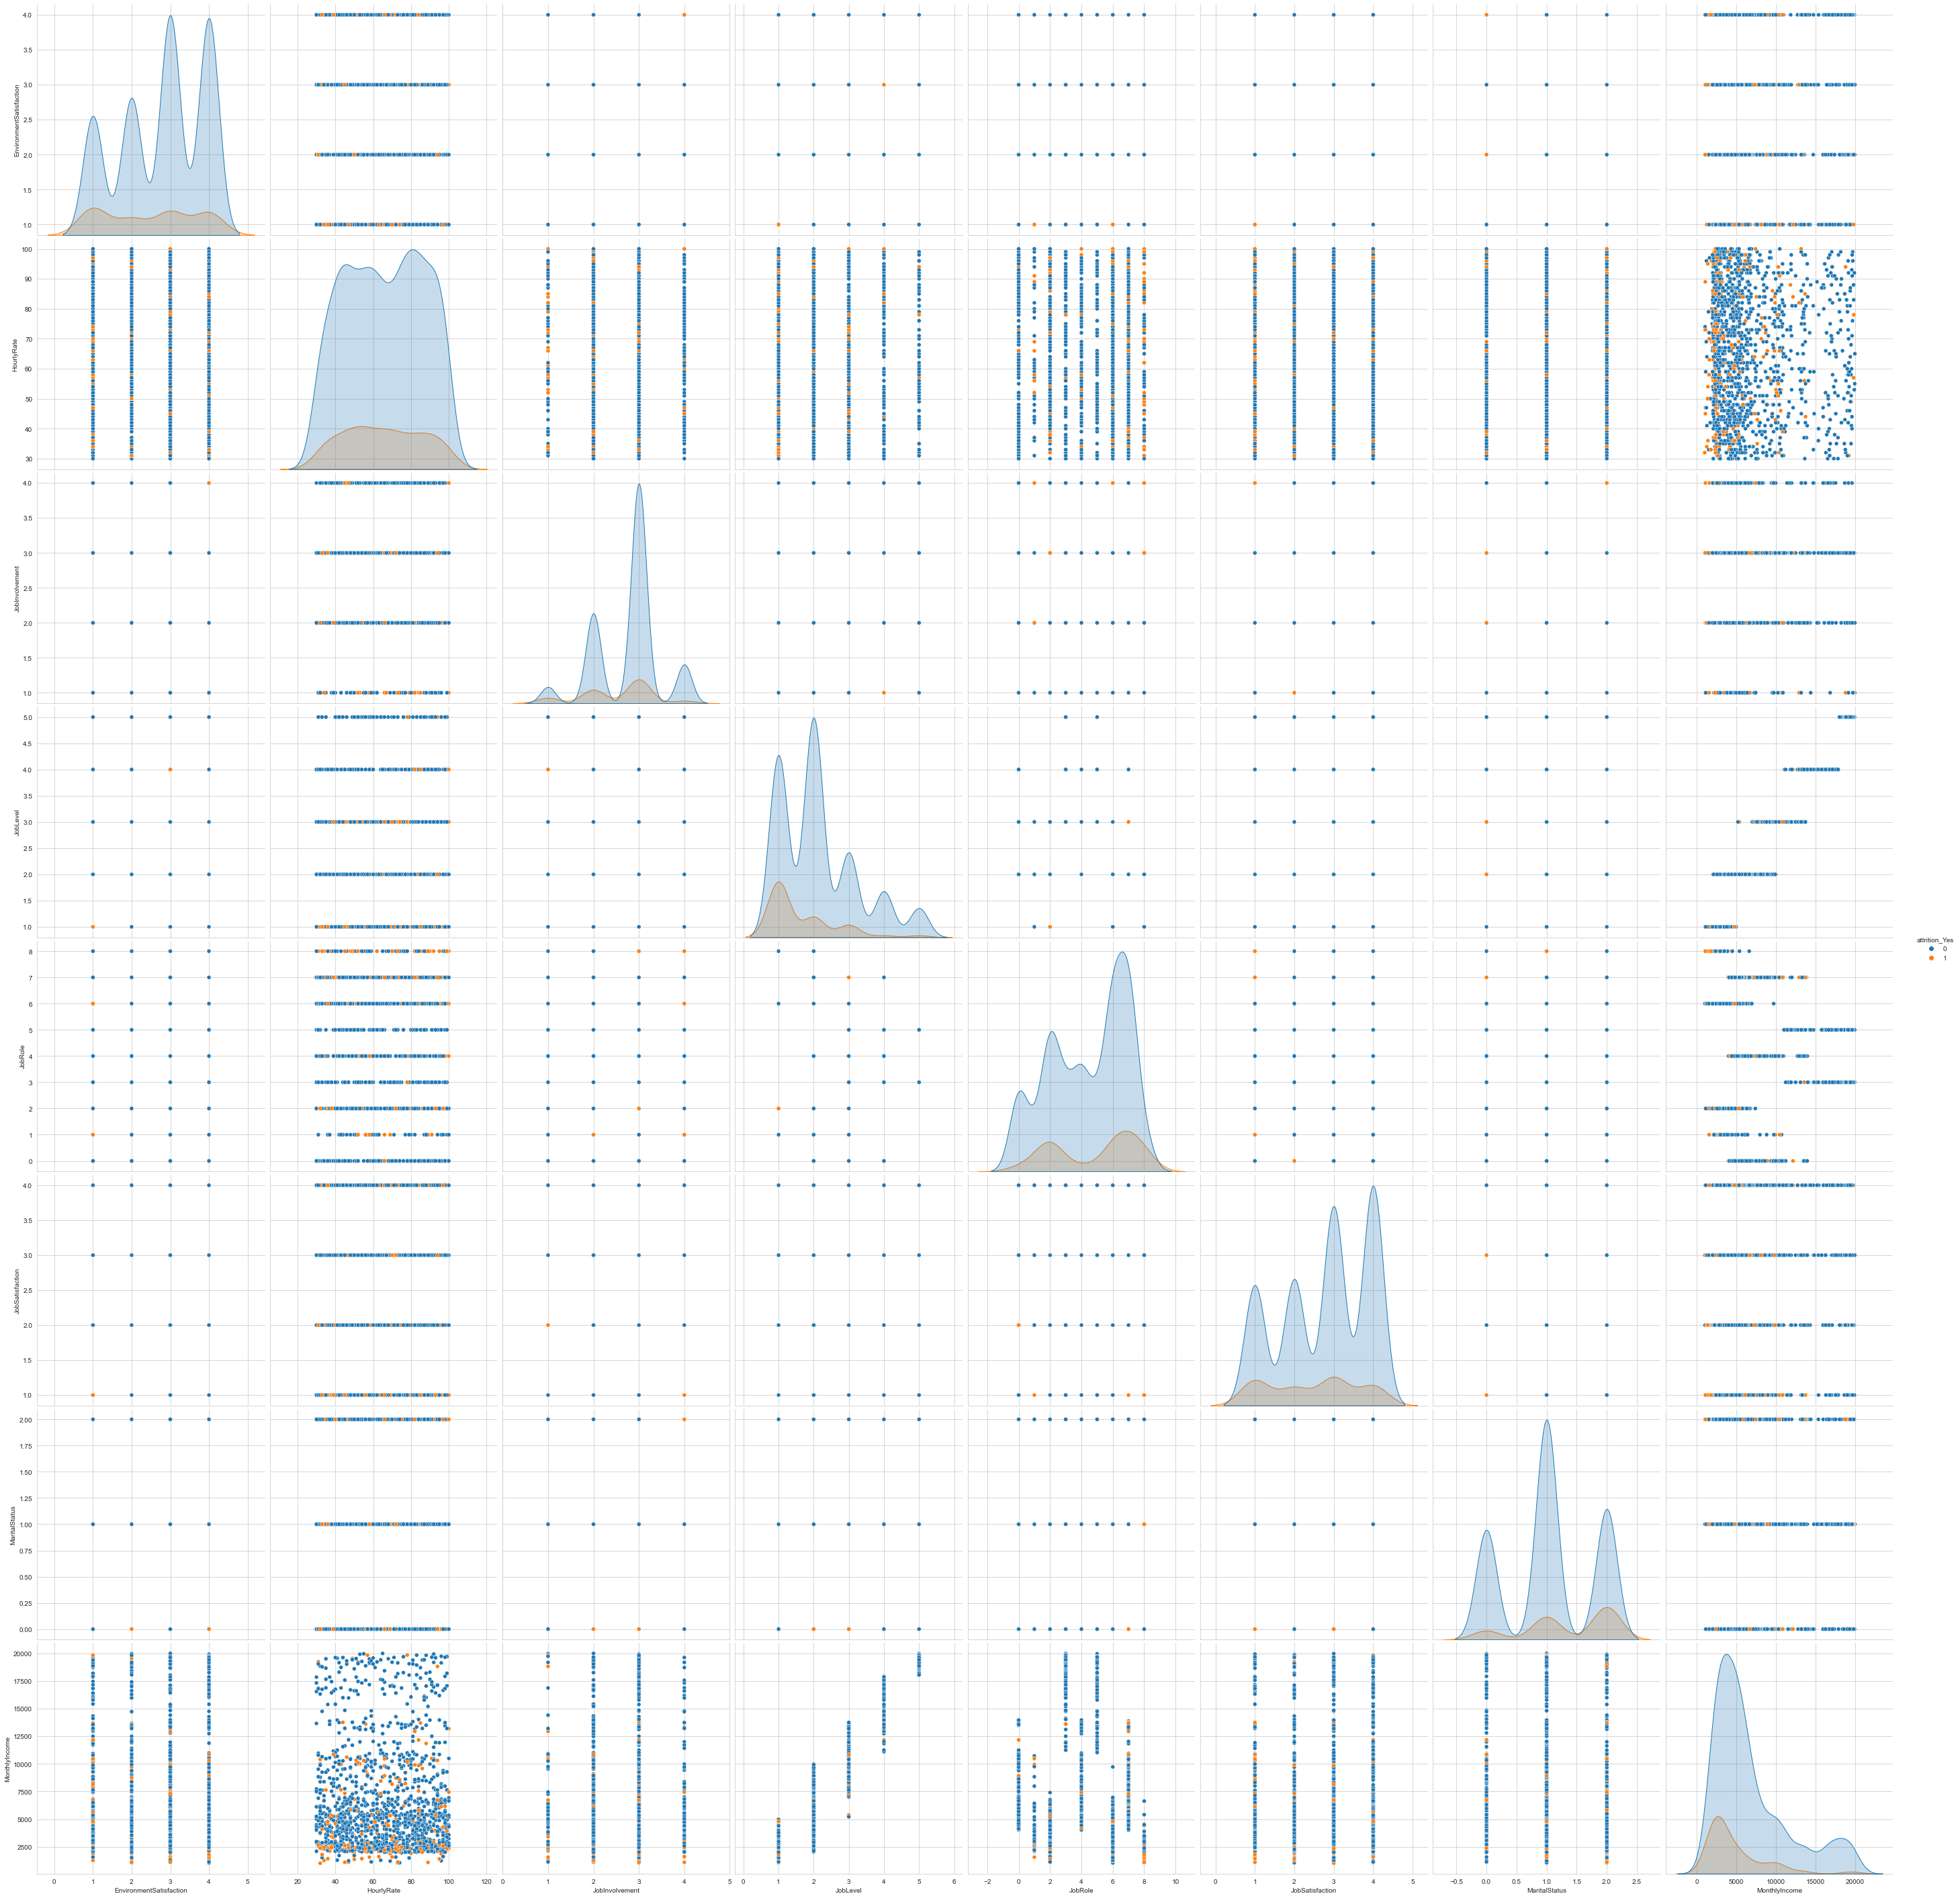

In [88]:
sns.set_style("whitegrid")
sns.pairplot(data2,hue="attrition_Yes",height=5)
plt.show()

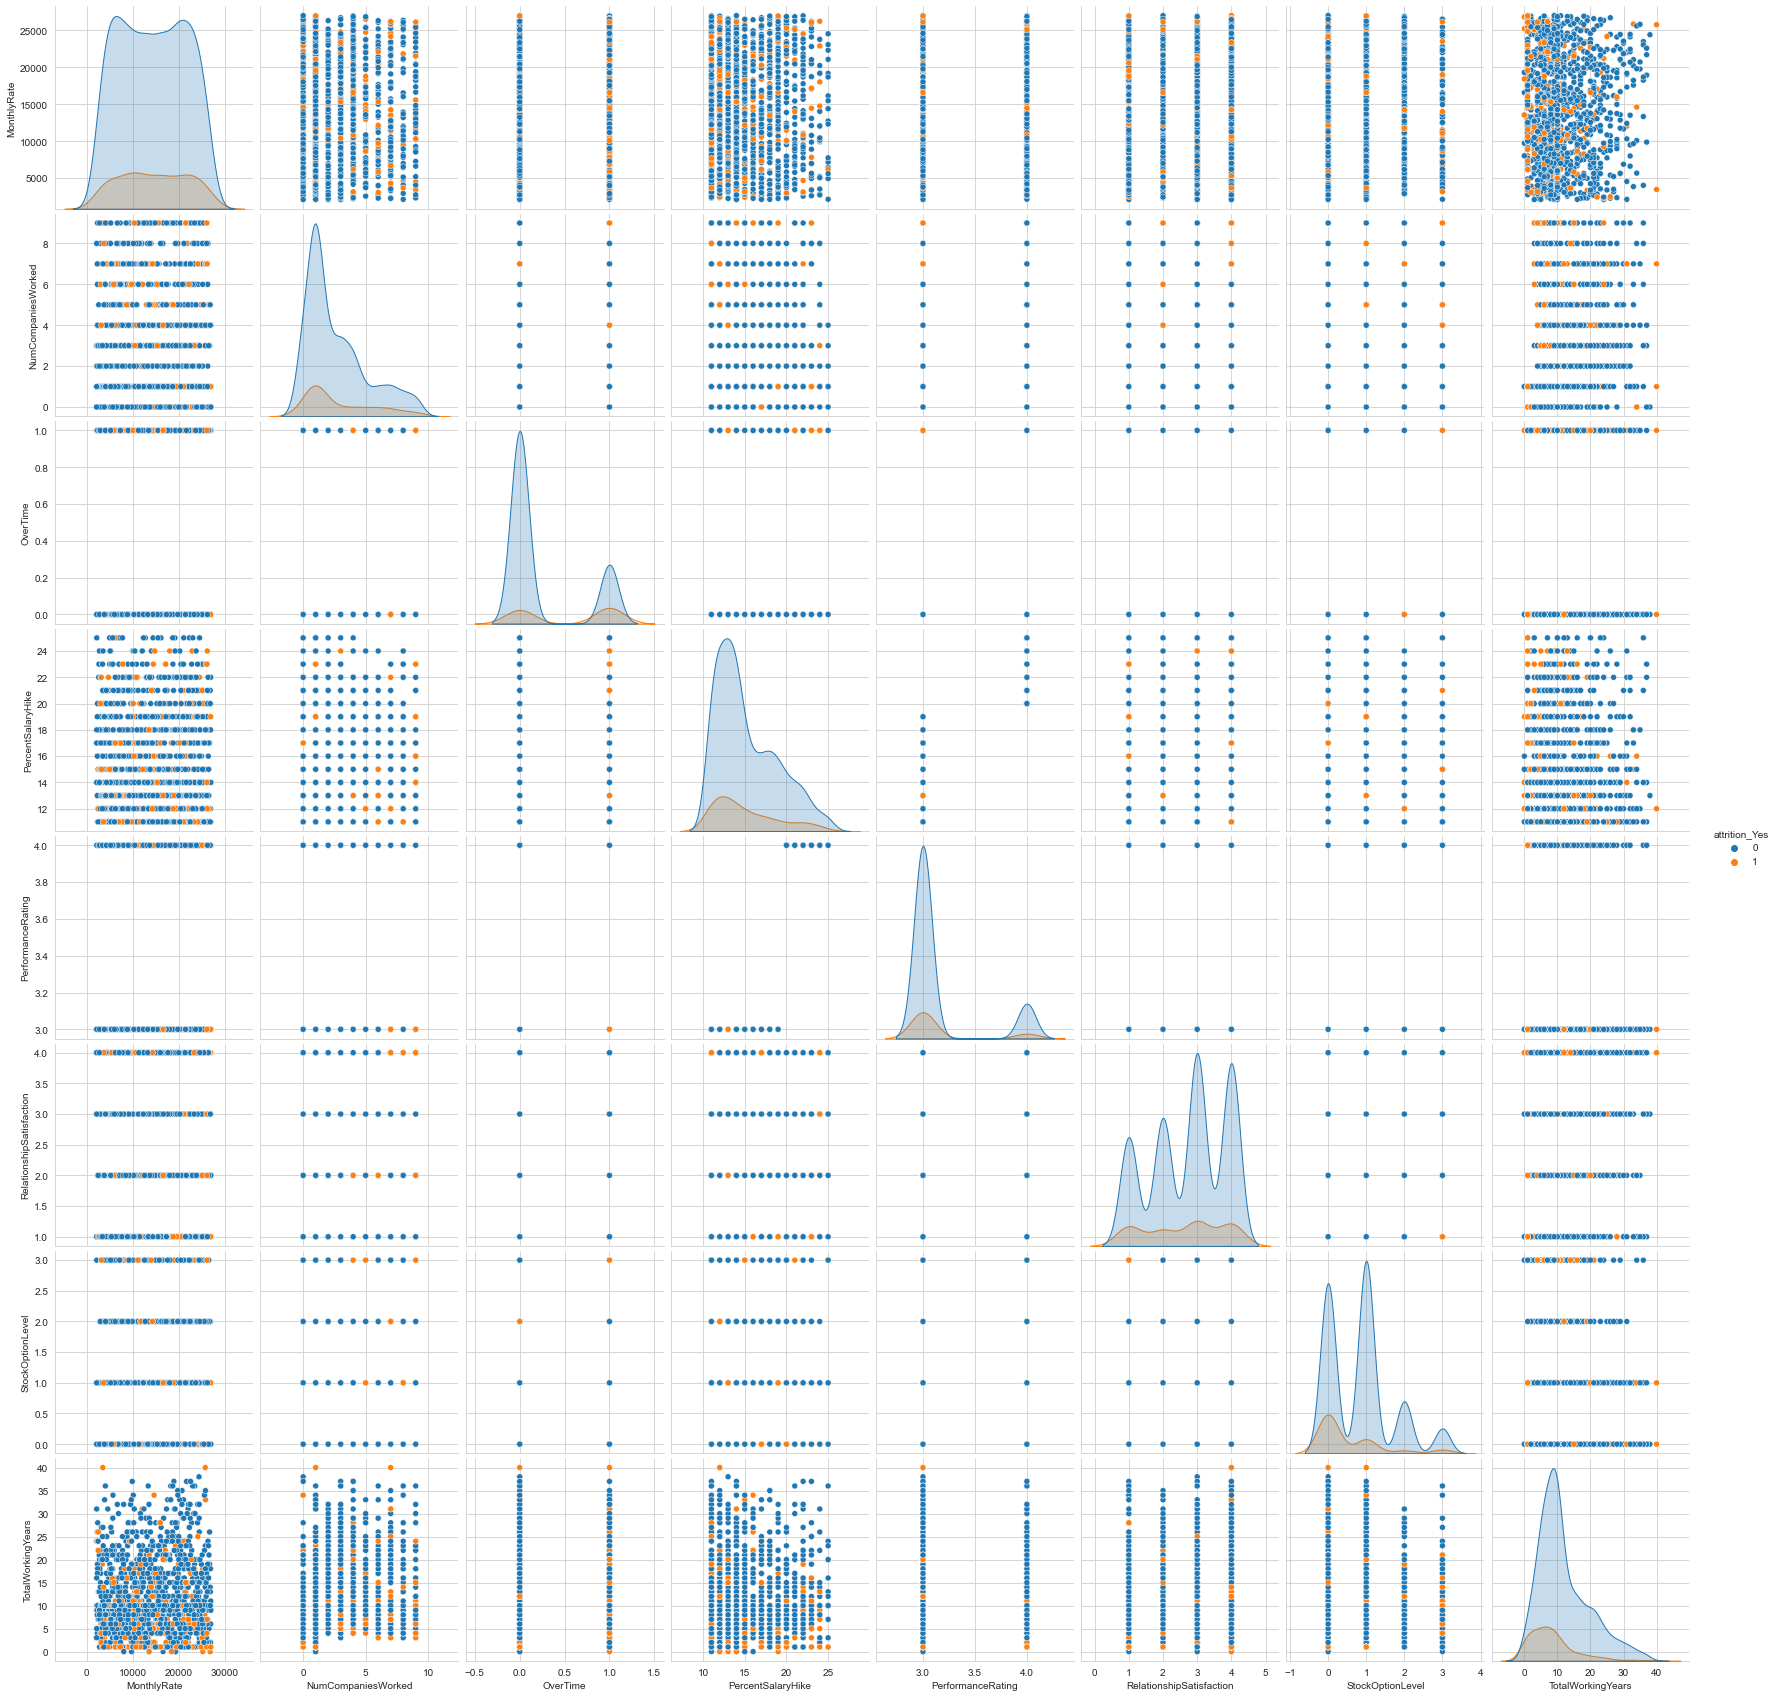

In [89]:
sns.set_style("whitegrid")
sns.pairplot(data3,hue="attrition_Yes",height=3)
plt.show()

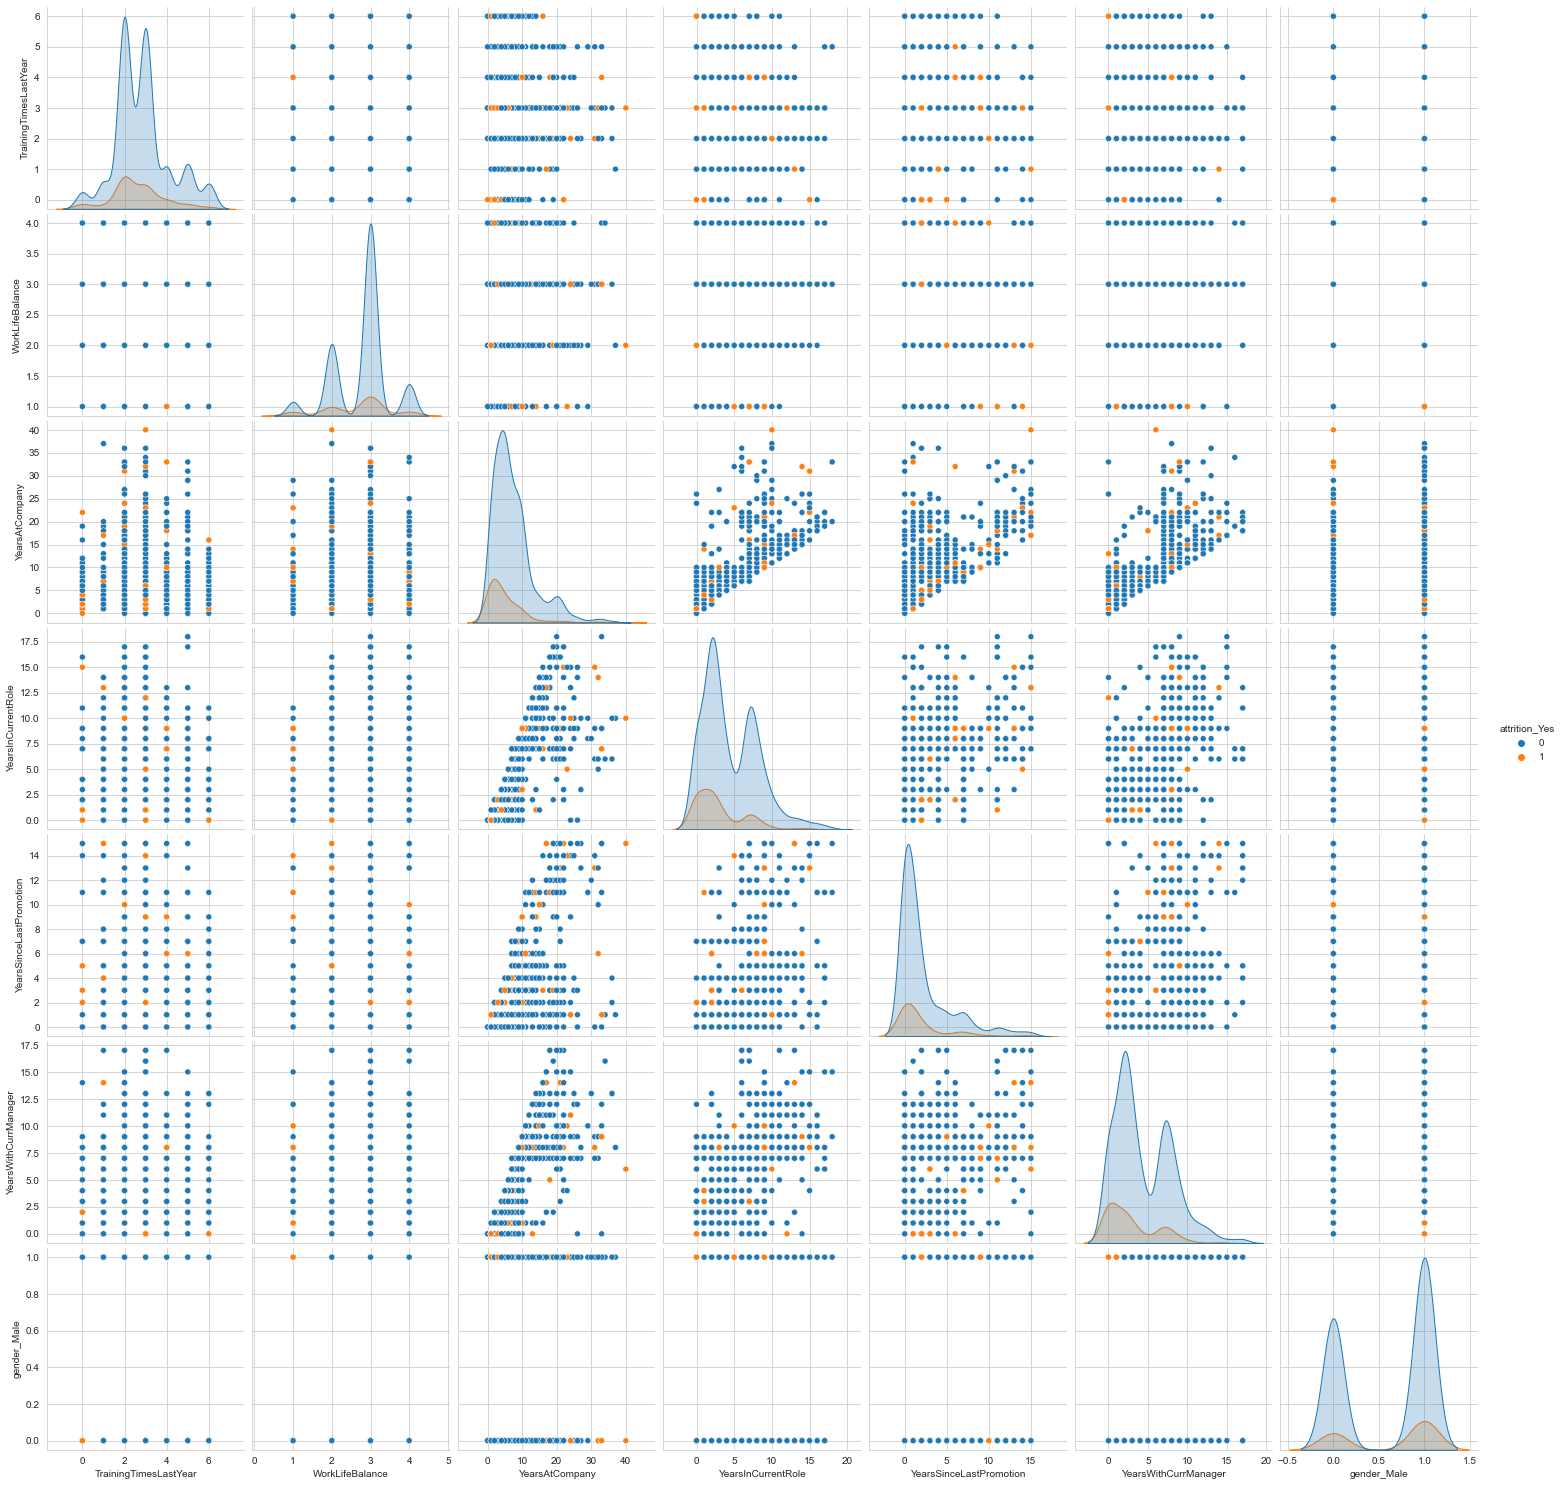

In [90]:
sns.set_style("whitegrid")
sns.pairplot(data4,hue="attrition_Yes",height=3)
plt.show()

# Splitting into Training and Testing

In [99]:
x=clean_data.iloc[:,0:30]
y=clean_data.iloc[:,30:31]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=7)

In [100]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((1029, 30), (441, 30), (1029, 1), (441, 1))

In [101]:
x_train

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
907    44               2       1099           2                 5          3   
878    42               0        179           0                 2          5   
683    25               2        867           2                19          2   
860    22               1       1256           1                 3          4   
868    28               2       1179           1                19          4   
...   ...             ...        ...         ...               ...        ...   
211    30               0        829           1                 1          1   
502    53               2        238           2                 1          1   
537    27               1        294           1                10          2   
1220   36               2        530           2                 2          4   
175    56               2        713           1                 8          3   

      EducationField  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
907                2                        2          88               3   
878                3                        4          79               4   
683                2                        3          36               2   
860                1                        3          48               2   
868                3                        4          78               2   
...              ...                      ...         ...             ...   
211                1                        3          88               2   
502                3                        4          34               3   
537                1                        4          32               3   
1220               1                        3          51               3   
175                1                        3          67               3   

      ...  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
907   ...                         3                 1                 26   
878   ...                         1                 1                 10   
683   ...                         3                 3                  1   
860   ...                         2                 1                  1   
868   ...                         3                 3                  6   
...   ...                       ...               ...                ...   
211   ...                         3                 0                 12   
502   ...                         4                 0                 18   
537   ...                         3                 2                  9   
1220  ...                         3                 0                 17   
175   ...                         3                 1                 19   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
907                       5                3              22   
878                       3                4               4   
683                       2                3               1   
860                       5                3               0   
868                       2                3               6   
...                     ...              ...             ...   
211                       2                3              11   
502                       2                4              14   
537                       4                2               9   
1220                      2                2              13   
175                       3                3               2   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
907                    9                        3                    10   
878                    3                        0                     3   
683                    0                        0                     0   
860                    0                        0                     0   
868                    5                        3  

In [102]:
y_train

attrition_Yes
907               0
878               0
683               1
860               1
868               0
...             ...
211               0
502               0
537               0
1220              0
175               0

[1029 rows x 1 columns]

# Preprocessing - Scaling the Data

In [103]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Decision Tree Classifier


In [104]:
classifier= DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
y_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n",y_accuracy)
print( classification_report(y_test, y_pred) )
print(cm)


[0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0]

 0.782312925170068
              precision    recall  f1-score   support

           0       0.90      0

# Logistic Regression

In [137]:
classifier= LogisticRegression()
classifier.fit(x_train, y_train.values.ravel())
y_pred=classifier.predict(x_test)
y_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n",y_accuracy)
print( classification_report(y_test, y_pred) )
print(cm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]

 0.8684807256235828
              precision    recall  f1-score   support

           0       0.89      

# K- Neighbors

In [131]:
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train.values.ravel())
y_pred=classifier.predict(x_test)
y_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n", y_accuracy)
print( classification_report(y_test, y_pred) )
print(cm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 0.8594104308390023
              precision    recall  f1-score   support

           0       0.86      

# Support Vector Machine

In [138]:
classifier= SVC(kernel='linear', random_state=7)
classifier.fit(x_train, y_train.values.ravel())
y_pred= classifier.predict(x_test)
y_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n", y_accuracy)
print(classification_report(y_test,y_pred))
print(cm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]

 0.8684807256235828
              precision    recall  f1-score   support

           0       0.88      

# Gaussian Naive Bayes

In [108]:
classifier=GaussianNB()
classifier.fit(x_train,y_train.values.ravel())
y_pred=classifier.predict(x_test)
y_accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n", y_accuracy)
print(classification_report(y_test,y_pred))
print(cm)

[0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0]

 0.7074829931972789
              precision    recall  f1-score   support

           0       0.92      

# MODEL SELECTION

In [109]:
models=[('LR', LogisticRegression(solver='lbfgs',multi_class='auto')),('LDA', LinearDiscriminantAnalysis()),('KNN', KNeighborsClassifier()),
       ('CART', DecisionTreeClassifier()),('NB', GaussianNB()),('SVM', SVC(gamma='auto'))]
names=[]
results=[]
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train.values.ravel() , cv=kfold, scoring='accuracy',error_score='raise' )
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.852284 (0.037797)
LDA: 0.852294 (0.031503)
KNN: 0.839644 (0.042173)
CART: 0.751190 (0.050241)
NB: 0.743499 (0.049116)
SVM: 0.854217 (0.039117)


As we can see SVM i.e, **Support Vector Machine** is the best classifier among all the model

For test size = 

**0.3**
LR: 0.852284 (0.037797)
LDA: 0.852294 (0.031503)
KNN: 0.839644 (0.042173)
CART: 0.753132 (0.058082)
NB: 0.743499 (0.049116)
**SVM: 0.854217 (0.039117)**
    
*0.35**
LR: 0.857522 (0.036699)
LDA: 0.856469 (0.035130)
KNN: 0.840757 (0.046980)
CART: 0.779989 (0.035165)
NB: 0.753936 (0.034469)
SVM: 0.855395 (0.035757)

0.4
LR: 0.857112 (0.028062)
LDA: 0.852592 (0.030975)
KNN: 0.836759 (0.041193)
CART: 0.781193 (0.036536)
NB: 0.743820 (0.045373)
SVM: 0.843539 (0.033922)

0.45
LR: 0.853997 (0.048063)
LDA: 0.856466 (0.050972)
KNN: 0.838025 (0.047986)
CART: 0.748812 (0.030375)
NB: 0.752423 (0.046150)
SVM: 0.846698 (0.051694)

0.5
LR: 0.870752 (0.025360)
LDA: 0.854424 (0.025214)
KNN: 0.839319 (0.040528)
CART: 0.770048 (0.033794)
NB: 0.778341 (0.067260)
SVM: 0.855720 (0.036470)
    
0.55
LR: 0.874514 (0.036111)
LDA: 0.868408 (0.036405)
KNN: 0.835120 (0.013998)
CART: 0.765626 (0.053599)
NB: 0.774559 (0.060855)
SVM: 0.847218 (0.022792)

0.6
LR: 0.857101 (0.044551)
LDA: 0.858825 (0.045608)
KNN: 0.840152 (0.037315)
CART: 0.785769 (0.043689)
NB: 0.785652 (0.036878)
SVM: 0.848714 (0.051587)